In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2,f_classif


In [14]:
df=pd.read_csv("../data/processed/data_v1.csv")


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 17 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1200000 non-null  int64  
 1   TP2              1200000 non-null  float64
 2   TP3              1200000 non-null  float64
 3   H1               1200000 non-null  float64
 4   DV_pressure      1200000 non-null  float64
 5   Reservoirs       1200000 non-null  float64
 6   Oil_temperature  1200000 non-null  float64
 7   Motor_current    1200000 non-null  float64
 8   COMP             1200000 non-null  float64
 9   DV_eletric       1200000 non-null  float64
 10  Towers           1200000 non-null  float64
 11  MPG              1200000 non-null  float64
 12  LPS              1200000 non-null  float64
 13  Pressure_switch  1200000 non-null  float64
 14  Oil_level        1200000 non-null  float64
 15  Caudal_impulses  1200000 non-null  float64
 16  Air_Leak         1

In [16]:
df["Air_Leak"].value_counts()

Air_Leak
0    1170046
1      29954
Name: count, dtype: int64

In [19]:
# df.drop(columns=["timestamp","Unnamed: 0"],inplace=True)


In [20]:
x=df.drop(columns=["Air_Leak"])
y=df["Air_Leak"]

In [21]:
# Use ANOVA F-value for feature selection
selector = SelectKBest(score_func=f_classif, k=11)  
X_new = selector.fit_transform(x, y)

selected_features = x.columns[selector.get_support()]

print("Selected features using ANOVA F-value:", selected_features)

Selected features using ANOVA F-value: Index(['TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs', 'Oil_temperature',
       'Motor_current', 'COMP', 'DV_eletric', 'Towers', 'MPG'],
      dtype='object')


In [22]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Create the RFE model and select the top features
rfe = RFE(model, n_features_to_select=11)
X_rfe = rfe.fit_transform(x, y)

# Get the selected feature names
selected_features_rfe = x.columns[rfe.support_]
print("Selected features (RFE):", selected_features_rfe)


Selected features (RFE): Index(['Unnamed: 0', 'TP2', 'TP3', 'H1', 'DV_pressure', 'Reservoirs',
       'Oil_temperature', 'Motor_current', 'COMP', 'DV_eletric', 'MPG'],
      dtype='object')


In [9]:
# Fit a Random Forest model
model.fit(x, y)

# Get feature importance
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': importance})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


            Feature  Importance
3       DV_pressure    0.319417
5   Oil_temperature    0.257375
4        Reservoirs    0.103340
1               TP3    0.098479
0               TP2    0.070734
2                H1    0.067708
6     Motor_current    0.048353
7              COMP    0.010427
10              MPG    0.009027
8        DV_eletric    0.008614
11              LPS    0.001962
9            Towers    0.001723
14  Caudal_impulses    0.001442
13        Oil_level    0.001117
12  Pressure_switch    0.000283


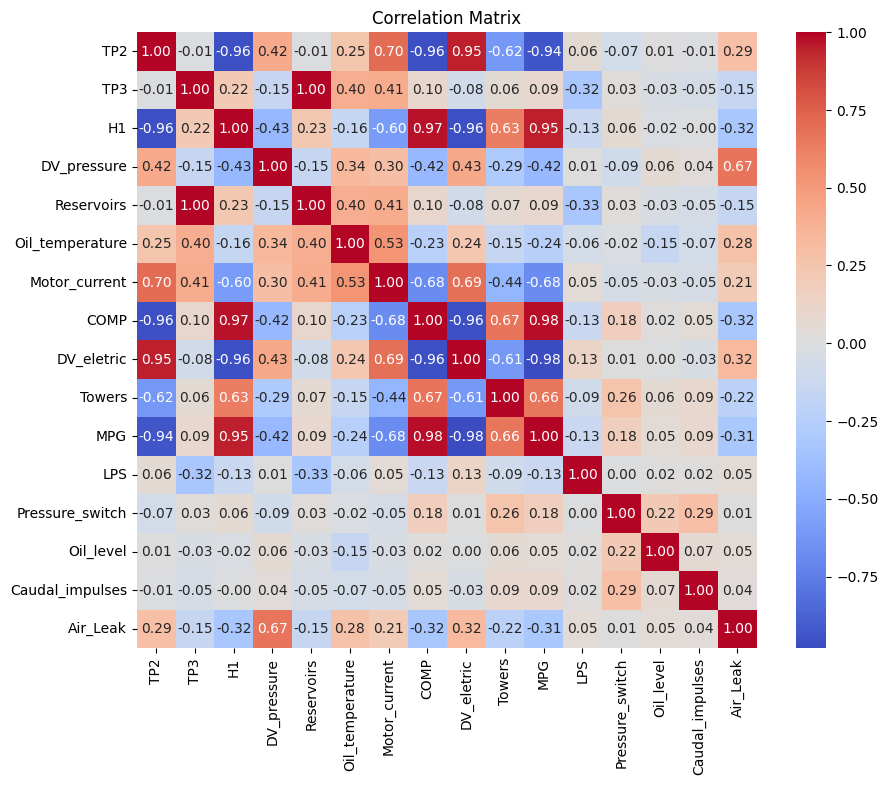

In [10]:
corr_matrix = df.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix")
plt.show()


In [ ]:
df.drop(columns=["Pressure_switch","Oil_level","Caudal_impulses","LPS"],inplace=True)

In [ ]:
corr_matrix = df.corr().round(2)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Matrix")
plt.show()
